In [16]:
import numpy as np
import pandas as pd
import os

In [17]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras import layers , models

In [18]:
train_data_dir = os.path.join('..', 'Drowsy_datset', 'train')
test_data_dir = os.path.join('..', 'Drowsy_datset', 'test')
training_files = os.listdir(train_data_dir)
testing_files = os.listdir(test_data_dir)
print(f"training data directory : ", train_data_dir)
print(f"testing data directory : ", test_data_dir)
print(f"training data files: ", training_files)
print(f"testing data files : ", testing_files)

training data directory :  ..\Drowsy_datset\train
testing data directory :  ..\Drowsy_datset\test
training data files:  ['DROWSY', 'NATURAL']
testing data files :  ['DROWSY', 'NATURAL']


In [19]:
train_drowsy_image_path = os.path.join(train_data_dir , 'DROWSY')
train_natural_image_path = os.path.join(train_data_dir, 'NATURAL')
train_drowsy_images= os.listdir(train_drowsy_image_path)
train_natural_images= os.listdir(train_natural_image_path)

test_drowsy_image_path = os.path.join(test_data_dir , 'DROWSY')
test_natural_image_path = os.path.join(test_data_dir, 'NATURAL')
test_drowsy_images= os.listdir(test_drowsy_image_path)
test_natural_images= os.listdir(test_natural_image_path)

print(" Number of files in the training dataset as per class")
print(f" No of image files in the DROWSY train folder : {len(train_drowsy_images)}")
print(f" No of image files in the NATURAL test folder : {len(train_natural_images)} ")
print("\n Number of files in the testing dataset as per class ")
print(f" No of image files in the DROWSY train folder : {len(test_drowsy_images)}")
print(f" No of image files in the NATURAL test folder : {len(test_natural_images)} ")

 Number of files in the training dataset as per class
 No of image files in the DROWSY train folder : 2809
 No of image files in the NATURAL test folder : 3050 

 Number of files in the testing dataset as per class 
 No of image files in the DROWSY train folder : 757
 No of image files in the NATURAL test folder : 726 


(48, 48, 3)


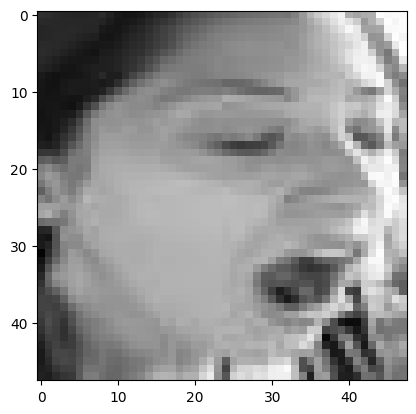

In [20]:
img = cv2.imread(os.path.join(train_drowsy_image_path, train_drowsy_images[0]))
hight, width, channels = img.shape
plt.imshow(img)
print(img.shape)

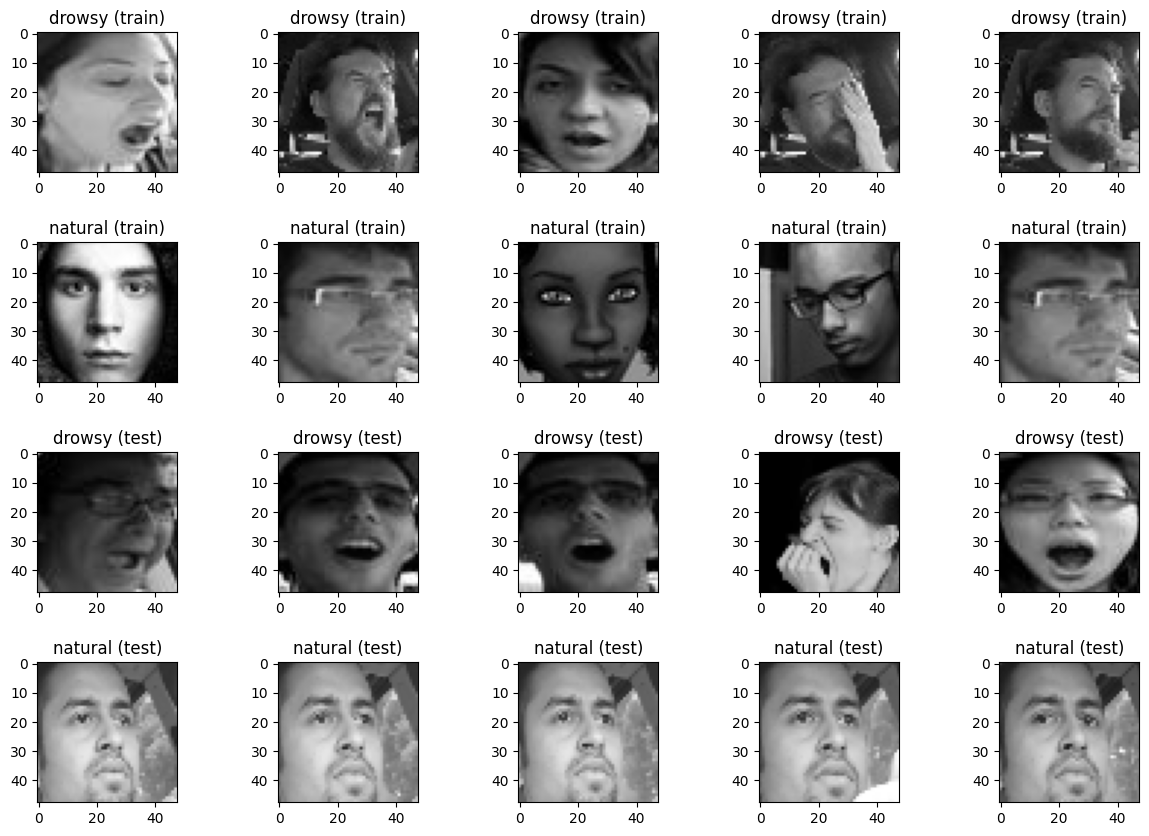

In [21]:
fig, axes = plt.subplots(4, 5, figsize=(15, 10))

for i, axes in enumerate(axes.flat):
    if i < 5:
        img = cv2.imread(os.path.join(train_drowsy_image_path, train_drowsy_images[i]))
        axes.imshow(img)
        axes.set_title('drowsy (train)')
    if i > 4 and i < 10:
        img = cv2.imread(os.path.join(train_natural_image_path, train_natural_images[i]))
        axes.imshow(img)
        axes.set_title('natural (train)')
    if i > 9 and i < 15:
        img = cv2.imread(os.path.join(test_drowsy_image_path, test_drowsy_images[i]))
        axes.imshow(img)
        axes.set_title('drowsy (test)')
    if i > 14 and i < 20:
        img = cv2.imread(os.path.join(test_natural_image_path, test_natural_images[i]))
        axes.imshow(img)
        axes.set_title('natural (test)')
plt.subplots_adjust(hspace=0.5)
plt.show()

In [22]:
data_generator = ImageDataGenerator(
    rescale = 1./255.0,
    validation_split = 0.2,
    rotation_range=20, # data augmentation
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_data_generator = ImageDataGenerator(
    rescale= 1./255.0,
)

train_data_gen = data_generator.flow_from_directory(
    train_data_dir,
    target_size=(48,48),
    class_mode='binary',
    batch_size= 32,
    subset='training',
    shuffle=True
)

val_data_gen = data_generator.flow_from_directory(
    train_data_dir,
    target_size=(48,48),
    class_mode='binary',
    batch_size=32,
    subset='validation',
    shuffle=True
)

test_data_gen = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size = (48,48),
    class_mode = 'binary',
    batch_size = 32,
    shuffle=True
)

Found 4688 images belonging to 2 classes.
Found 1171 images belonging to 2 classes.
Found 1483 images belonging to 2 classes.


In [23]:
print(f" training data samples :  {train_data_gen.samples} {train_data_gen.class_indices}")
print(f" testing data samples : {test_data_gen.samples} {test_data_gen.class_indices}")

 training data samples :  4688 {'DROWSY': 0, 'NATURAL': 1}
 testing data samples : 1483 {'DROWSY': 0, 'NATURAL': 1}


In [24]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,3)),
    layers.MaxPool2D((2,2)),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),

    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 16928)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                1083456   
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1084417 (4.14 MB)
Trainable params: 1084417 (4.14 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [25]:

history = model.fit(
    train_data_gen,
    steps_per_epoch= train_data_gen.samples // train_data_gen.batch_size,
    epochs=10,
    validation_data = val_data_gen,
    validation_steps = val_data_gen.samples // val_data_gen.batch_size
)

Epoch 1/10
146/146 [==============================] - 14s 94ms/step - loss: 0.6260 - accuracy: 0.6564 - val_loss: 0.7167 - val_accuracy: 0.5477
Epoch 2/10
146/146 [==============================] - 10s 68ms/step - loss: 0.5332 - accuracy: 0.7375 - val_loss: 0.7413 - val_accuracy: 0.5816
Epoch 3/10
146/146 [==============================] - 10s 68ms/step - loss: 0.5090 - accuracy: 0.7446 - val_loss: 0.8168 - val_accuracy: 0.5477
Epoch 4/10
146/146 [==============================] - 10s 66ms/step - loss: 0.4814 - accuracy: 0.7691 - val_loss: 0.6909 - val_accuracy: 0.6085
Epoch 5/10
146/146 [==============================] - 10s 67ms/step - loss: 0.4570 - accuracy: 0.7872 - val_loss: 0.7334 - val_accuracy: 0.6050
Epoch 6/10
146/146 [==============================] - 10s 67ms/step - loss: 0.4565 - accuracy: 0.7874 - val_loss: 0.6632 - val_accuracy: 0.6736
Epoch 7/10
146/146 [==============================] - 10s 67ms/step - loss: 0.4260 - accuracy: 0.8056 - val_loss: 0.6691 - val_accuracy:

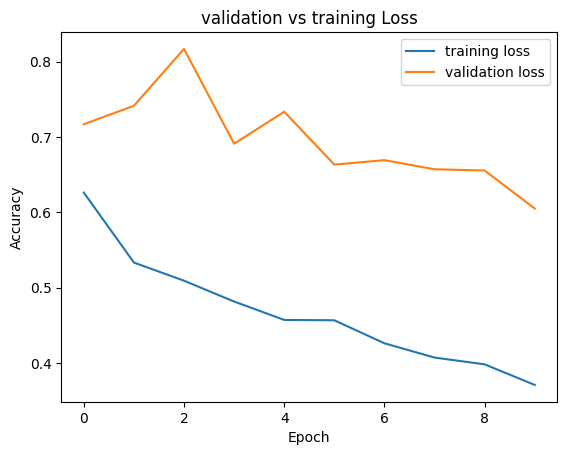

In [26]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('validation vs training Loss')
plt.legend()
plt.show()

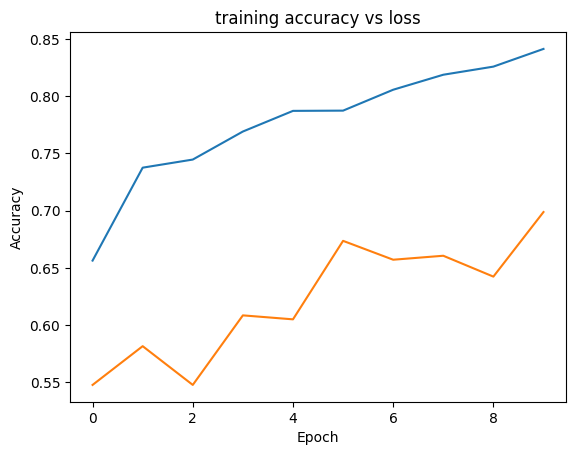

In [27]:
plt.plot(history.history['accuracy'], label='validation accuracy')
plt.plot(history.history['val_accuracy'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("training accuracy vs loss")
plt.show()

In [28]:
loss , accuracy = model.evaluate(test_data_gen)

47/47 [==============================] - 1s 30ms/step - loss: 0.2923 - accuracy: 0.8766


In [29]:
print(f" the training loss is : {history.history['loss'][-1]}")
print(f" the testing loss is : {loss}")

print(f" traiing accuracy is : {history.history['accuracy'][-1]}")
print(f" testing accuracy is : {accuracy}")
model.save(os.path.join('data', 'models', 'fatigue_model.keras'))

 the training loss is : 0.3706899583339691
 the testing loss is : 0.2923278510570526
 traiing accuracy is : 0.8412800431251526
 testing accuracy is : 0.8766014575958252
